# Ethnicity Prediction

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Experiment 1: Exploring Dataset

Read the sample dataset using panda dataframe

In [2]:
ethnea_df = pd.read_csv('names_ethnea_genni_country_sample.csv')
ethnea_df

,AUID,Last,First,Ethnea,Genni,PubCountry
0,12872768_1,_Filho_,_Elias_Abdalla_,HISPANIC,M,Brazil
1,12565879_3,_Bou_Abdallah_,_Jad_,ARAB,M,France
2,17569133_1,_Abdel_Aziz_,_Ayman_,ARAB,M,USA
3,11213157_2,_Abdelmoula_,_Salma_,ARAB,F,Tunisia
4,11439058_1,_Abdou_,_Ibrahim_,ARAB,M,Egypt
5,10919608_3,_Abou_El_Fettouh_,_Hazem_,ARAB,M,USA
6,17314740_3,_Aboutaam_,_Rola_,ARAB,F,France
7,16564217_2,_Alvim_de_Abreu_Silva_Rodrigues_,_Aida_Alexandra_,HISPANIC,F,Brazil
8,6339395_2,_Cristina_Affonso_Scaletsky_,_Isabel_,HISPANIC,F,Brazil
9,7796089_2,_Agbenyega_,_Tsiri_,AFRICAN,-,Ghana


- Build a name_series list that combine first_name and last_name form the dataframe.
- Do replace the `_` character with space, and strip the left and right space.
- Transform all name data into uppercase letter
- Make an ethnic_series based on the Ethnea field on the dataframe

In [3]:
#combine first_name and last_name
name_series = ethnea_df['Last'] + ethnea_df['First']
name_series = name_series.replace('_',' ',regex=True)
name_series = name_series.str.strip()
name_series = name_series.str.upper()

#extract ethnicity rows
ethnic_series = ethnea_df.Ethnea.values

Make a name_dict which contains ethnicity pair for the name. Useful to build a name frequency and P(name|ethnicity)

In [4]:
#make a name vector from all the dataset
name_dict = {}
for i,name_i in enumerate(name_series.str.split(' ')):
    for name in name_i:
        if name != '':
            if name not in name_dict:
                name_dict[name] = []
            name_dict[name].append(ethnic_series[i])

Get Total vocabulary of names 

In [5]:
# total 
len(name_dict)

34834

In [15]:
name_dict

{'LADA': ['SLAV'],
 'LLISO': ['HISPANIC'],
 'DENMEADE': ['ENGLISH'],
 'NIDZAM': ['ARAB'],
 'NASH': ['ENGLISH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'ENGLISH'],
 'JANITZKY': ['GERMAN'],
 'AMOORE': ['ENGLISH'],
 'QUENTIN': ['ENGLISH', 'ENGLISH', 'ENGLISH'],
 'MIAN': ['ARAB', 'ARAB'],
 'MIGLIOZZI': ['ITALIAN'],
 'PUCHE': ['HISPANIC'],
 'VASIMON': ['THAI'],
 'FITZMAURICE': ['ENGLISH'],
 'EVALAPPAN': ['INDIAN'],
 'MICHIFUMI': ['JAPANESE'],
 'PODUSKA': ['ENGLISH'],
 'CHI': ['CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'ENGLISH',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE',
  'CHINESE'],
 'AWASTHI': ['INDIAN', 'INDIAN'],
 'HAWK': ['KOREAN'],
 'FEREYDOUN': ['ENGLISH'],
 'BLAUMEISER': ['GERMAN'],
 'SEYED': ['ARAB', 'ARAB', 'ARAB', 'ARAB', 'ARAB', 'ARAB', 'ARAB'],
 'DRBEL': ['SLAV'],
 'DANKO': ['HUNGARIAN'],
 'IWASHITA': ['JAPANESE', 

In [17]:
# assume ethnic is a document
ethnic_dict = {}
for i,ethnic_i in enumerate(ethnic_series):
    if ethnic_i not in ethnic_dict:
        ethnic_dict[ethnic_i] = []
    # split the name
    split_name = name_series[i].split(' ')
    for name_j in split_name:
        if name_j!='':
            ethnic_dict[ethnic_i].append(name_j)

In [21]:
ethnic_keys = list(ethnic_dict.keys())
name_keys = list(name_dict.keys())

Some insight about distribution on the sample dataset, we can see that we have inbalance dataset in which English has more distribution compare to the others.

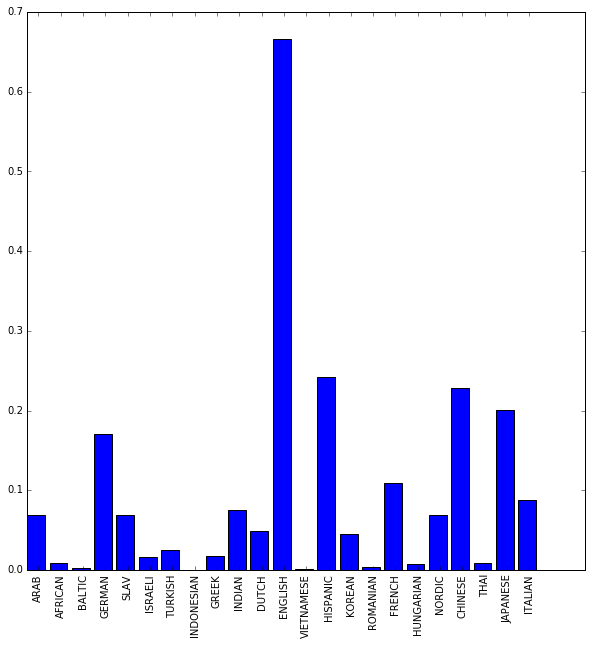

In [81]:
fig,ax = plt.subplots(figsize=(10,10))
ax_bar = ax.bar(range(len(ethnic_keys)),prob_ethnic.values())
plt_xticks = plt.xticks(np.array(range(len(ethnic_keys)))+0.5, prob_ethnic.keys(), rotation='vertical')

Let us do some simple bayesian probability theorem first.
From the dictionary and dataset above we can compute these probabilities:
- P(Name = n)
- P(Ethnic = e)
- P(Name = n|Ethnic = e) => probability of a name given ethnic
- P(Ethnic = e | Name = n) = (P(Ethnic = e) * P(Name =n|Ethnic=e)) / P(Name = n)

In [113]:
# P(Name=n)
total_observation = len(ethnic_series)
n_name = len(name_keys)
n_ethnic = len(ethnic_keys)

prob_name = {}
for name_i in name_keys:
    prob_name[name_i] = len(name_dict[name_i])/total_observation

# P(Ethnic=e)
prob_ethnic = {}
for ethnic_i in ethnic_keys:
    prob_ethnic[ethnic_i] = len(ethnic_dict[ethnic_i])/total_observation
    
# P(Name = n|Ethnic=e), conditional probability of name belong to some ethnic, 
# should produce matrix
# of the name and ethnicity
prob_name_ethnic = np.zeros([n_name,n_ethnic])
total_join = 0
for name_i,ethnic_i in name_dict.items():
    for ethnic_j in ethnic_i:
        prob_name_ethnic[name_keys.index(name_i),ethnic_keys.index(ethnic_j)]+=1
        total_join+=1

# compute the probability by dividing frequency with total_join
prob_name_ethnic = prob_name_ethnic / total_join

Next we try to calculate the Probability of the Ethnic given Name. There are several assumptions that I made on this case
- Name can be more than one word
- Every word in one name is treated independently. Therefore, we can do probability join as multiplication process
- Curse of zero probability: there is no zero probability, every zero probability will be treated as very small number (epsilon) to avoid multiply by zero calculation

In [238]:
# assume there is no 0 probability, only small number of chance
epsilon = 1E-8

# compute the probability of ethnic given name by doing the bayes
# P(Ethnic = e | Name = n) = (P(Ethnic = e) * P(Name=n|Ethnic=e)) / P(Name = n)
# let say P(Ethnic=e|Name=name)
def prob_ethnic_one(name):
    prob_ethnic_result = np.zeros(n_ethnic)
    for ethnic_i,prob in prob_ethnic.items():
        prob_ethnic_result[ethnic_keys.index(ethnic_i)] = prob * prob_name_ethnic[name_keys.index(name),ethnic_keys.index(ethnic_i)] / prob_name[name]
    # normalized
    prob_ethnic_result = prob_ethnic_result + epsilon
    return prob_ethnic_result

def prob_ethnic_name(name):
    # assume the name can contain more than one word independent each other
    # we join the probability by multiplying the probability of their name
    name_split = name.split(' ')
    prob_ethnic_result = np.ones(n_ethnic)
    for name_i in name_split:
        if name_i != '':
            prob_ethnic_result = prob_ethnic_result * prob_ethnic_one(name_i.upper())
    # normalized
    prob_ethnic_result = prob_ethnic_result / prob_ethnic_result.sum()
    sort_index = prob_ethnic_result.argsort()[::-1]    
    sorted_result = []
    for ind in sort_index:
        sorted_result.append({ethnic_keys[ind]: prob_ethnic_result[ind]})
    return prob_ethnic_result, sorted_result


In [256]:
prob_ethnic_name('ingo glockner')

(array([  9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          7.10782469e-01,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          2.89215632e-01,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08]),
 [{'GERMAN': 0.71078246870764872},
  {'NORDIC': 0.28921563197949712},
  {'ITALIAN': 9.0443469236324672e-08},
  {'INDIAN': 9.0443469236324672e-08},
  {'AFRICAN': 9.0443469236324672e-08},
  {'BALTIC': 9.0443469236324672e-08},
  {'INDONESIAN': 9.0443469236324672e-08},
  {'SLAV': 9.0443469236324672e-08},
  {'ISRAELI': 9.0443469236324672e-08},
  {'TURKISH': 9.0443469236324672e-08},
  {'VIETNAMESE': 9.0443469236324672e-08},
  {'GREEK': 9.0443469236324672e-08},
  {'DUTCH': 9.0443469236324672e-08},
  {'JAPANESE': 9.0443469

In [261]:
pd.DataFrame([name_series,ethnic_series])

TypeError: __init__() got an unexpected keyword argument 'axes'

In [262]:
?pd.DataFrame

## Experiment 2 - Importance of Embedding

From the previous experiment, we can see that from the dataset we can produce the probability distribution between name and ethnicity and later build a model to infer the ethnicity given a series of names.

However, our names exploration are limited to the names that exist on the vocabulary extracted from the dataset only. What if the model is challenged by names that don't exist yet in the vocabulary. From this problem, we notice the importance of word embedding in this name-ethnicity prediction.

The word embedding is a technique to interpret the word, phrases or set of text to a continues vector space with lower dimension. After we produce the vector, we can use the information to compute similarity or distance between two words that can be used to predict the most similar word for the unknown vocabulary.

In [221]:
#calculate tf
# prepare tf-idf matrix
tf_idf = np.zeros( [len(name_dict),len(ethnic_keys)])
idf = np.zeros( len(name_dict) )
total_name_on_eth = np.zeros( len(ethnic_dict) ) 
for name,ethnic in name_dict.items():
    ethnic_tracer = []
    for ethnic_i in ethnic:
        if ethnic_i not in ethnic_tracer:
            idf[name_keys.index(name)]+=1
            ethnic_tracer.append(ethnic_i)
        tf_idf[name_keys.index(name),ethnic_keys.index(ethnic_i)]+=1
        total_name_on_eth[ethnic_keys.index(ethnic_i)]+=1
        #compute the tf and assign it to tf_idf
    idf[name_keys.index(name)] = np.log(len(ethnic_keys)/idf[name_keys.index(name)])
    
# compute tf
for i,ethnic_i in enumerate(ethnic_keys):
    tf_idf[:,i] = tf_idf[:,i] / total_name_on_eth[i]

    
# multiply with the idf
#for i,name_i in enumerate(name_list):
#    tf_idf[i,:] = tf_idf[i,:]*idf[i]

In [222]:
tf_idf

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.00163613,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [223]:
len(ethnic_list)

44567

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [225]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

In [226]:
dataset.keys()

dict_keys(['target', 'DESCR', 'description', 'filenames', 'data', 'target_names'])

In [227]:
data_tmp = []
for key in ethnic_list:
    data_tmp.append(" ".join(ethnic_dict[key]))

In [ ]:
data_tmp

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=23)
tfidf = tfidf_vectorizer.fit_transform(data_tmp)

In [ ]:
tfidf.toarray()

In [ ]:
data_samples = name_series.values
n_features = 5000

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_features=n_features)
name_vector = tfidf_vectorizer.fit_transform(data_samples)
name_vector = name_vector.toarray()

In [ ]:
x = tfidf_vectorizer.transform(['Nikolaus Robert'])

In [ ]:
np.where(x.toarray()>0)

In [ ]:
name_dict['ROBERT']

In [ ]:
tf_idf[name_keys.index('NIKOLAUS')]

In [ ]:
#convert the first name and last name combine into a vector representing the ethnicity matrix
name_list_idf = []
for name_i in name_series:
    name_split = name_i.split(' ')
    y = np.ones(len(ethnic_list))
    for x in name_split:
        if x != '':
            y = y * tf_idf[name_keys.index(x)]
    name_list_idf.append(y)


In [ ]:
name_list_idf[5]

In [ ]:
#ingest the vectors into logistic regression with ethnicity as the target class
from sklearn.linear_model import LogisticRegression
# need to do it later
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
#                                                    random_state=42)

logreg = LogisticRegression(class_weight='balanced')

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(name_list_idf, ethnic_series)

In [ ]:
logreg.predict_proba(name_list_idf[6])

In [ ]:
result = logreg.predict(name_list_idf)

In [ ]:
sum(result == ethnic_series)

In [ ]:
sum(ethnic_series=='ENGLISH')

['HISPANIC',
 'ARAB',
 'ARAB',
 'ARAB',
 'ARAB',
 'ARAB',
 'ARAB',
 'HISPANIC',
 'HISPANIC',
 'AFRICAN',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'ARAB',
 'ARAB',
 'ARAB',
 'ARAB',
 'TURKISH',
 'JAPANESE',
 'TURKISH',
 'ARAB',
 'ARAB',
 'ARAB',
 'ARAB',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'ITALIAN',
 'ARAB',
 'AFRICAN',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'ARAB',
 'TURKISH',
 'GERMAN',
 'HISPANIC',
 'HISPANIC',
 'INDIAN',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'NORDIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'ARAB',
 'ITALIAN',
 'CHINESE',
 'ENGLISH',
 'ENGLISH',
 'NORDIC',
 'NORDIC',
 'SLAV',
 'HISPANIC',
 'AFRICAN',
 'GERMAN',
 'FRENCH',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'TURKISH',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'ARAB',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'HISPANIC',
 'TURKISH',
 'JAPANESE',
 'ENGLISH',
 'NORDIC',
 'TURKISH',
 '